# Supervised Learning: Classification

### Using Decision Tree Model in scikit-learn

### Predicting Phone Prices

<small>"Bob" has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.</small>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [17]:
#load the dataset from the url into pandas dataframe
url = "https://raw.githubusercontent.com/SReidDataSci/mobileprice/main/data/train.csv"
price_range = [0, 1, 2, 3]
dataframe = pd.read_csv(url)

display(dataframe)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [18]:
X = dataframe.values[:, :-1]

Y = dataframe.values[:, -1]

In [19]:
# Randomly split data into 60% training set and 40% test set
# We use 60% of the dataset to train a model, and use the rest to test the model predictions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [20]:
# use the model to make predictions on the test data
print("Predicting labels of the test data set - %i examples" % (len(X_test)))
Y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))

Predicting labels of the test data set - 800 examples
Accuracy:  0.8275


### Visualizing the results

We can visualize the results in a confusion matrix. The confusion matrix show us exactly how many times the model predicted a specific price range and what the correct answers are

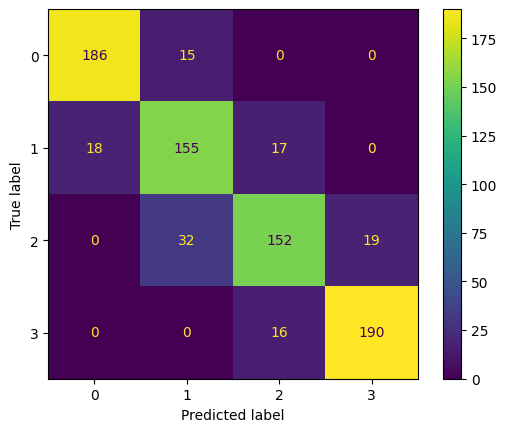

In [15]:
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=price_range)
disp.plot()

plt.show()

### Predicting a phone price

<small> We can now take information on a new phone that Bob may decide to market and use our model to predict the price range that it fits under. </small>

In [21]:
x = [[842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1]]

print("The price range of the phone is: ", clf.predict(x))

The price range of the phone is:  [1.]
